# Описание проекта - продажи интернет магазина игр

- Интернет-магазине продаёт по всему миру компьютерные игры. Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нужно выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
- Доступны данные до 2016 года. Предположим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы с данными. Неважно, прогнозируем ли вмы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
- В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

## План выполнения проекта

### Общая информация
**Откроем файл с данными и изучим общую информацию**

### Подготовка данных
**Подготовим данные**
- Заменим названия столбцов (приведем к нижнему регистру);
- Преобразуем данные в нужные типы. Опишем, в каких столбцах заменили тип данных и почему;
- Обработаем пропуски при необходимости:
- Опишем, почему заполнили пропуски определённым образом или почему не стали это делать;
- Опишем причины, которые могли привести к пропускам;
- Обратим внимание на аббревиатуру 'tbd' в столбце с оценкой пользователей. Отдельно выделим это значение и опишем, как его обработать;
- Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец.

### Исследовательский анализ

**Проведем исследовательский анализ данных**

- Посмотрим, сколько игр выпускалось в разные годы. Определим, важны ли исторические данные
- Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. Определим за какой характерный срок появляются новые и исчезают старые платформы
- Возьмем данные за соответствующий актуальный период. Актуальный период определим самостоятельно в результате исследования предыдущих вопросов. Основной фактор — эти данные помогут построить прогноз на 2017 год.
- Не будем учитывать в работе данные за предыдущие годы.
- Определим какие платформы лидируют по продажам, растут или падают. Выберем несколько потенциально прибыльных платформ.
- Построим график boxplot по глобальным продажам игр в разбивке по платформам. Опишем результат.
- Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. Сформулируем выводы.
- Соотнесем выводы с продажами игр на других платформах.
- Посмотрим на общее распределение игр по жанрам. Оценим самые прибыльные жанры. Посмотрим какие жанры имеют самые высокие и самые низкие продажи

### Потреты пользователей

**Составим портрет пользователя каждого региона**
- Определим для пользователя каждого региона (NA, EU, JP
  - Самые популярные платформы (топ-5). Опишем различия в долях продаж.
  - Самые популярные жанры (топ-5). Поясним разницу.
- Определим, влияет ли рейтинг ESRB на продажи в отдельном регионе

### Проверка гипотез
**Проверим гипотезы**

- Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.
 - Определим пороговое значение alpha.    
        
### Общий вывод

**Сформулируем общий вывод**

## Описание данных

- Name — название игры
- Platform — платформа
- Year_of_Release — год выпуска
- Genre — жанр игры
- NA_sales — продажи в Северной Америке (миллионы проданных копий)
- EU_sales — продажи в Европе (миллионы проданных копий)
- JP_sales — продажи в Японии (миллионы проданных копий)
- Other_sales — продажи в других странах (миллионы проданных копий)
- Critic_Score — оценка критиков (максимум 100)
- User_Score — оценка пользователей (максимум 10)
- Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board). Эта ассоциация определяет рейтинг компьютерных игр и присваивает им подходящую возрастную категорию.
- Данные за 2016 год могут быть неполными.
- Как будут проверять мой проект?

# Выполнение проекта

## Общая информация

### Импорт csv файла

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

try:
    data=pd.read_csv('C:/Users/kaz-106/YandexDisk/Py-projects/02_Practicum projects/041_Final project - Module 1/games.csv')
except:
    data=pd.read_csv('https://code.s3.yandex.net/datasets/games.csv')

### Общий вид таблицы

In [2]:
data.head(10)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


### Основная информация о таблице

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


## Подготовка данных

### Переименование столбцов

In [4]:
data.columns = data.columns.str.lower()

In [5]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


### Проверка на дубликаты

In [6]:
data.duplicated().sum()

0

В названиях платформ могут быть неявные дубликаты - проверим - дубликатов нет

In [7]:
data['platform'].unique()

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

В названиях жанров могут быть неявные дубликаты - проверим - дубликатов нет

In [8]:
data['genre'].unique()

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

### Обработка пропусков

#### Проверка количества пропусков

In [9]:
data.isna().sum()

name                  2
platform              0
year_of_release     269
genre                 2
na_sales              0
eu_sales              0
jp_sales              0
other_sales           0
critic_score       8578
user_score         6701
rating             6766
dtype: int64

In [10]:
data.query('name!=name')

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


#### Name и genre name
В столбцах Name и Genre всего две строки с пропусками - удаляем

In [11]:
data=data.dropna(subset=['name'])

In [12]:
data['name'].isna().sum()

0

#### Year of release
В столбце Year_of_Release всего 1% пропусков - удаляем

In [13]:
data=data.dropna(subset=['year_of_release'])

In [14]:
data['year_of_release'].isna().sum()

0

In [15]:
data['critic_score'].unique()

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

In [16]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [17]:
data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

#### Critic score и user score

В столбце critic score больше пропусков чем в user score, однако отзывы критиков очень близки к отзывам пользователей. Заменим пропуски в critic score соотвествующими значениями из user score

In [18]:
data.loc[data['critic_score'].isna(),'critic_score']=data.loc[data['critic_score'].isna(),'user_score']
data['critic_score'].isna().sum()

6572

К пропускам в этих столбцах могут вести различные причины
 - Очень старые года выпуска, нет данных для таких древних игр
 - Очень низкие продажи, было недостаточно информациии для формирования оценок игроков/критиков и рейтинга
 
**Данные в этих столбцах слабо связаны с другими и не могут быть заполнены средним или медианным значением. Оставим пропуски как есть, а для исследований характеристик связанных с этими столбцами будем исключать пропуски из рассмотрения**



In [19]:
# display(data.sort_values(by='year_of_release'))
# display(data.query('na_sales<=0.03 and eu_sales<=0.03 and jp_sales<=0.03 and \
# other_sales<=0.03 and critic_score.isna()'))
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


#### TBD в оценке пользователей

TBD - to be defined. Фактически означает пропуск, так этих данных нет в этом датасете. Заменим tbd на NaN

In [20]:
data['user_score']=data['user_score'].replace('tbd', np.NaN)
data['critic_score']=data['critic_score'].replace('tbd', np.NaN)

#### Пропуски в столбце rating

Много пропусков в данном столбце - возможно не все производители хотят/могут присваивать своим играм рейтинг по правилам ESRB. Заменим пропуски на заглушки - NA (not applicable)

In [21]:
data['rating']=data['rating'].fillna('NA')
data['rating'].unique()

array(['E', 'NA', 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

#### Суммарные продажи по регионам

In [22]:
data['sum_sales']=data['na_sales']+data['eu_sales']+data['jp_sales']+data['other_sales']
data.head(10)

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NA,40.24
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NA,31.38
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NA,30.26
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E,29.80
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E,28.91
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E,28.32
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NA,28.31


## Преобразование типов

- Год может быть только целым
- Приведем рейтинги к float

In [23]:
data['year_of_release'] = data['year_of_release'].apply(int)
data['critic_score']=data['critic_score'].astype('float')
data['user_score']=data['user_score'].astype('float')
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16444 entries, 0 to 16714
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     8552 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16444 non-null  object 
 11  sum_sales        16444 non-null  float64
dtypes: float64(7), int64(1), object(4)
memory usage: 1.6+ MB


## Исследовательский анализ

### Выпуск игр по годам

Посмотрим, сколько игр выпускалось в разные годы. Определим, важны ли исторические данные

- с 1994 года начался резкий рост количества выпускаемых игр
- Данные до 1993 года включительно имеют относительно низкое влияние на общую картину
- 2008 и 2009 годы - лучшие годы по количеству новых игр

### Продажи по платформам (за всю историю продаж)

Посмотрим, как менялись продажи по платформам. Выберем платформы с наибольшими суммарными продажами и построим распределение по годам. 
- Платформы появляются и исчезают, уступая место новым. Характерный срок жизни платформы: 8-10 лет
- Предудущее утверждение справедливо для почти всех платформ, кроме некоторых долгожителей, например PC, который появившись в 1985 остается на рынке до сих пор

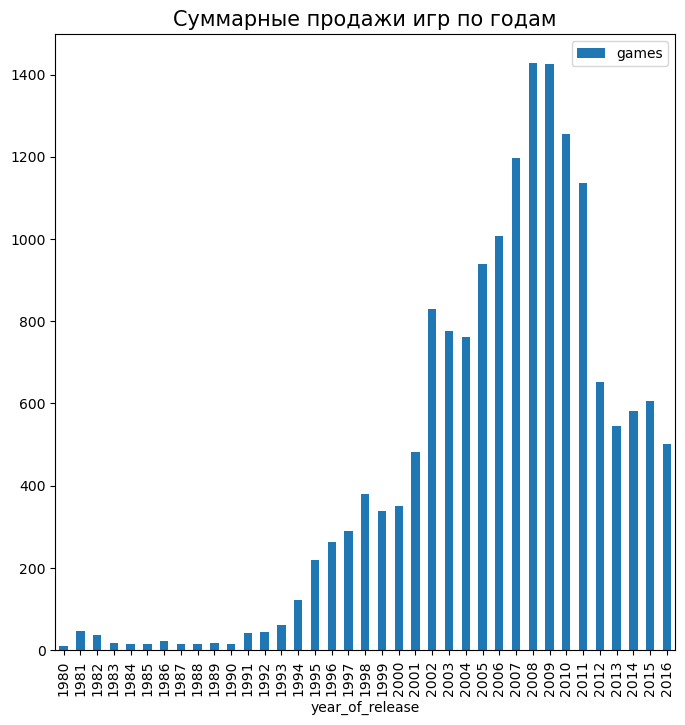

In [24]:
data_games_years=data.pivot_table(index='year_of_release',values='name',aggfunc='count')
data_games_years.plot(kind='bar',y='name',figsize=(8,8),label='games')
plt.title('Суммарные продажи игр по годам', fontsize=15)
plt.show()

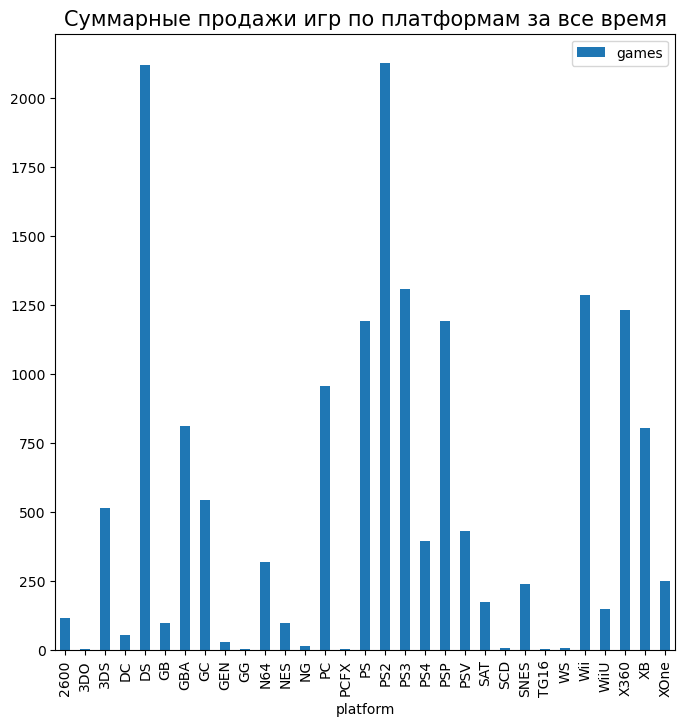

In [25]:
data_games_platform=data.pivot_table(index='platform',values='name',aggfunc='count')
data_games_platform.plot(kind='bar',y='name',figsize=(8,8),label='games')
plt.title('Суммарные продажи игр по платформам за все время', fontsize=15)
plt.show()

In [26]:
print(data['platform'].unique())
data_platform=data.pivot_table(index=['year_of_release','platform'],values='sum_sales',aggfunc='sum')
display(data_platform.head(10))

['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX']


sum_sales
year_of_release platform           
1980            2600          11.38
1981            2600          35.68
1982            2600          28.88
1983            2600           5.84
                NES           10.96
1984            2600           0.27
                NES           50.08
1985            2600           0.45
                DS             0.02
                NES           53.44

In [27]:
platform_life=[]
for t in data['platform'].unique():
    last_year = data.loc[(data['platform']==t),'year_of_release'].max()
    first_year = data.loc[(data['platform']==t),'year_of_release'].min()
    platform_life.append(last_year-first_year)

display(platform_life)

[10,
 11,
 13,
 28,
 11,
 10,
 11,
 9,
 7,
 3,
 5,
 6,
 9,
 8,
 31,
 9,
 11,
 3,
 4,
 6,
 4,
 10,
 5,
 5,
 1,
 2,
 3,
 0,
 1,
 0,
 0]

#### Найдем платформы с наибольшими продажами (с 2015 года)
- Самые популярные платформы: PS4, XOne, 3DS, WiiU, PS3, PC

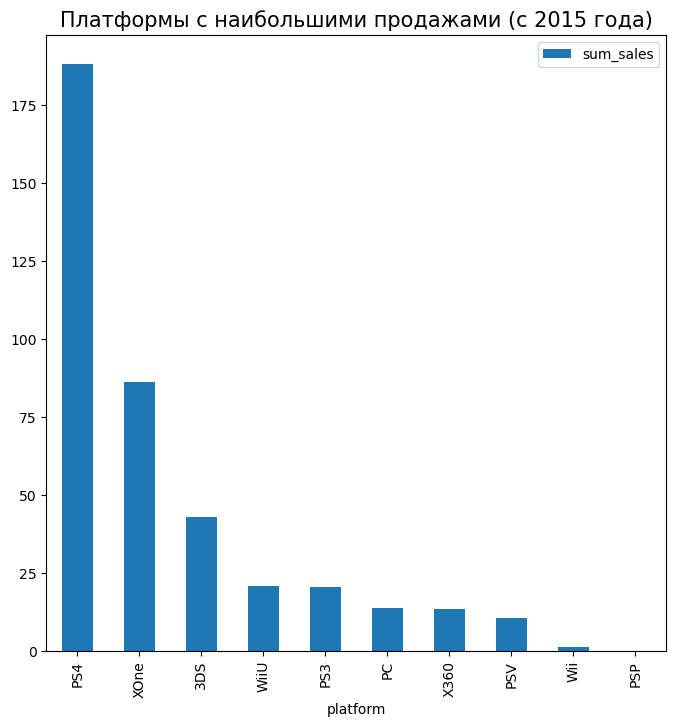

In [28]:
data_2015=data.query('year_of_release>=2015')
sales_by_platform = data_2015.pivot_table(index='platform', values='sum_sales', \
                                     aggfunc='sum').sort_values(by='sum_sales', ascending=False)
sales_by_platform.plot(kind='bar',y='sum_sales',figsize=(8,8),label='sum_sales')
plt.title('Платформы с наибольшими продажами (с 2015 года)', fontsize=15)
plt.show()

#### Выберем период с которого рассматривать данные
- Индустрия игр зависит от вкусов людей и быстро меняется
- Примем во внимание, что мы будем строить прогноз на 2017 год, поэтому очень старые данные, в т.ч. по устаревшим платформам будут неактуальны. Возьмем данные за последние два года: 2015-2016
 

Построим графики продаж для самых популярных платформ

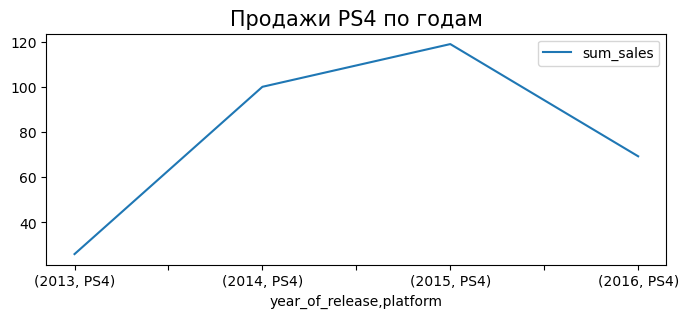

In [29]:
data_platform.query('platform=="PS4"').plot(y='sum_sales',figsize=(8,3),label='sum_sales')
plt.title('Продажи PS4 по годам', fontsize=15)
plt.show()

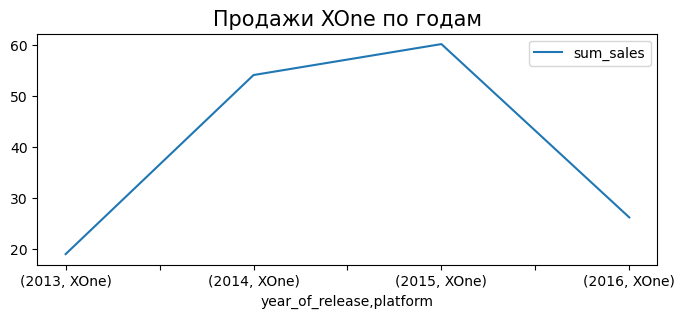

In [30]:
data_platform.query('platform=="XOne"').plot(y='sum_sales',figsize=(8,3),label='sum_sales')
plt.title('Продажи XOne по годам', fontsize=15)
plt.show()

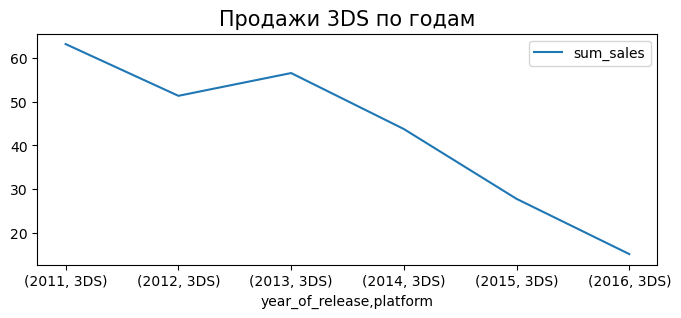

In [31]:
data_platform.query('platform=="3DS"').plot(y='sum_sales',figsize=(8,3),label='sum_sales')
plt.title('Продажи 3DS по годам', fontsize=15)
plt.show()

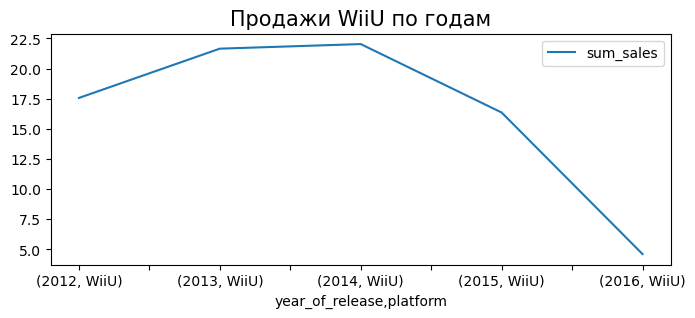

In [32]:
data_platform.query('platform=="WiiU"').plot(y='sum_sales',figsize=(8,3),label='sum_sales')
plt.title('Продажи WiiU по годам', fontsize=15)
plt.show()

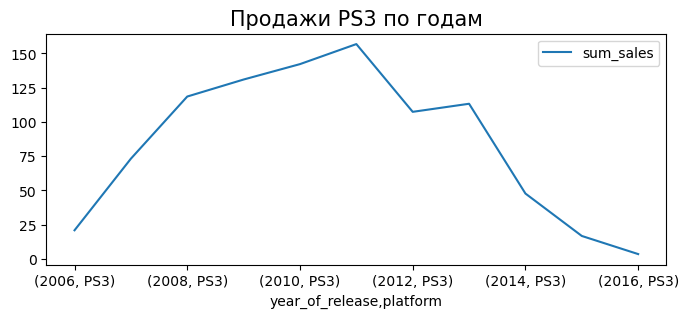

In [33]:
data_platform.query('platform=="PS3"').plot(y='sum_sales',figsize=(8,3),label='sum_sales')
plt.title('Продажи PS3 по годам', fontsize=15)
plt.show()

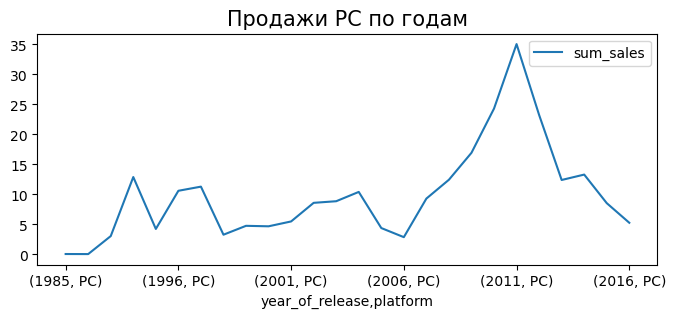

In [34]:
data_platform.query('platform=="PC"').plot(y='sum_sales',figsize=(8,3),label='sum_sales')
plt.title('Продажи PC по годам', fontsize=15)
plt.show()

#### Отбросим данные для других платформ и года до 2015

In [35]:
top_5=['PS4', 'XOne', '3DS', 'WiiU', 'PS3']

data_5_2015 = data.query('platform in @top_5 and year_of_release>=2015')

,sum_sales
platform,
PS4,188.15
XOne,86.29
3DS,42.92
WiiU,20.95
PS3,20.42


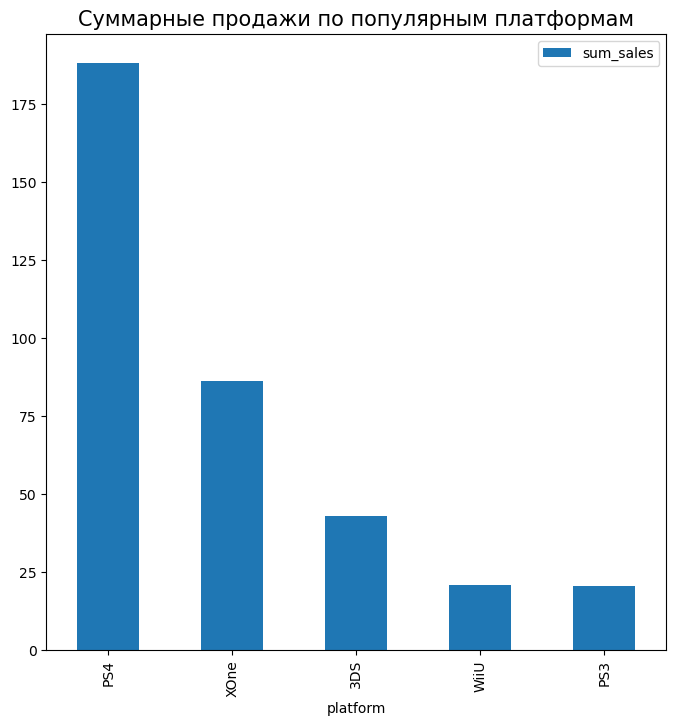

In [36]:
data_5_2015_pivot=data_5_2015.pivot_table(index='platform', values='sum_sales', \
                                     aggfunc='sum').sort_values(by='sum_sales', ascending=False)
display(data_5_2015_pivot)
data_5_2015_pivot.plot(kind='bar',y='sum_sales',figsize=(8,8),label='sum_sales')
plt.title('Суммарные продажи по популярным платформам', fontsize=15)
plt.show()

#### Вывод
- PS4 - абсюлютный лидер, следующий за ней XOne отстает в два раза
- Продажи игр на всех консолях падали в 2016 году

### Boxplot по продажам игр
- Некоторые значения очень высокие - похоже на выбросы
- Однако, некоторые игры-шедевры могут быть крайне популярны, в десятки раз популярнее других, нельзя избавляться от них


count    753.000000
mean       0.476401
std        1.116464
min        0.010000
25%        0.040000
50%        0.110000
75%        0.390000
max       14.630000
Name: sum_sales, dtype: float64


(0.0, 20.0)

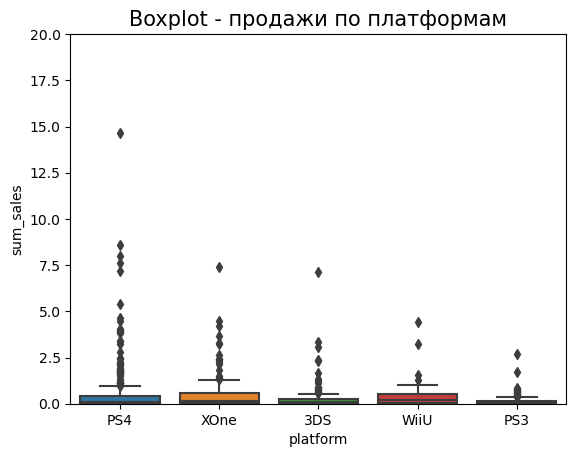

In [37]:
print(data_5_2015['sum_sales'].describe())
sns.boxplot(data=data_5_2015, x='platform', y='sum_sales')
plt.title('Boxplot - продажи по платформам', fontsize=15)
plt.ylim(0, 20)

(0.0, 2.0)

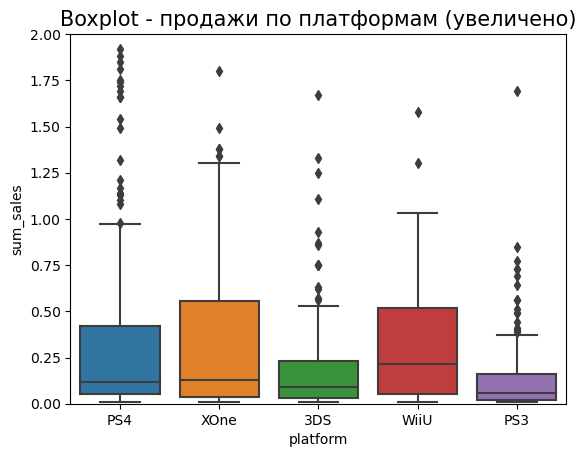

In [38]:
sns.boxplot(data=data_5_2015, x='platform', y='sum_sales')
plt.title('Boxplot - продажи по платформам (увеличено)', fontsize=15)
plt.ylim(0, 2)

**Вывод:**

- Несмотря на наличие очень высоких значений по некоторым строкам - нельзя считать их за выбросы
- Самые перспективные платформы: PS4 и XOne

### Зависимость продаж и отзывов - XOne

Посмотрим, как влияют на продажи внутри одной популярной платформы (XOne) отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами.
- Сделаем срез по XOne
- Здесь придется избавиться от пропусков в столбцах critic scope и user_score, иначе таблицу не получится обработать
- Рассчитаем корреляцию по двух типам отзывов

In [39]:
xone=data_5_2015.query('platform=="XOne"')
display(xone.head())
xone.info()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,sum_sales
99,Call of Duty: Black Ops 3,XOne,2015,Shooter,4.59,2.11,0.01,0.68,NaN,NaN,NA,7.39
242,Halo 5: Guardians,XOne,2015,Shooter,2.78,1.27,0.03,0.41,84.0,6.4,T,4.49
270,Fallout 4,XOne,2015,Role-Playing,2.51,1.32,0.01,0.38,88.0,6.2,M,4.22
342,Star Wars Battlefront (2015),XOne,2015,Shooter,2.04,1.28,0.02,0.32,NaN,NaN,NA,3.66
413,Gears of War: Ultimate Edition,XOne,2015,Shooter,2.61,0.33,0.00,0.34,82.0,7.5,M,3.28


<class 'pandas.core.frame.DataFrame'>
Int64Index: 167 entries, 99 to 16672
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             167 non-null    object 
 1   platform         167 non-null    object 
 2   year_of_release  167 non-null    int64  
 3   genre            167 non-null    object 
 4   na_sales         167 non-null    float64
 5   eu_sales         167 non-null    float64
 6   jp_sales         167 non-null    float64
 7   other_sales      167 non-null    float64
 8   critic_score     125 non-null    float64
 9   user_score       121 non-null    float64
 10  rating           167 non-null    object 
 11  sum_sales        167 non-null    float64
dtypes: float64(7), int64(1), object(4)
memory usage: 17.0+ KB


In [40]:
xone=xone.dropna(subset=['critic_score','user_score','rating'])
xone.isna().sum()

name               0
platform           0
year_of_release    0
genre              0
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
sum_sales          0
dtype: int64

In [41]:
xone['critic_score'].corr(xone['sum_sales'])

0.39248008938135054

Text(0.5, 1.0, 'scatter - critic_score')

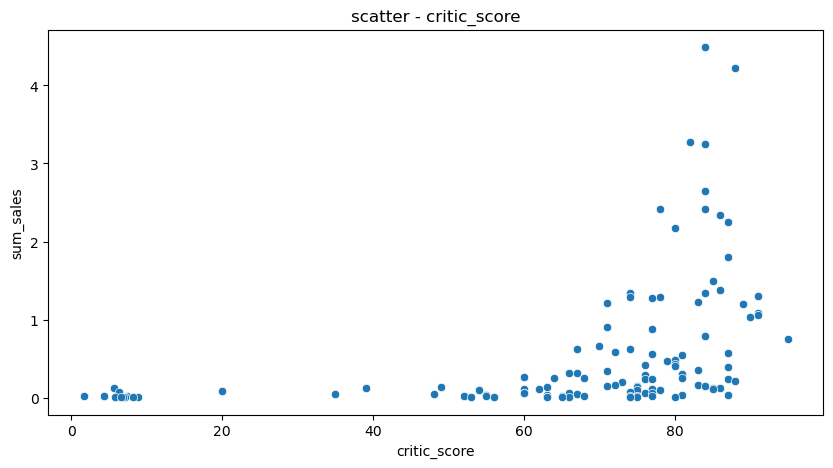

In [42]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='critic_score', y='sum_sales', data=xone)
plt.title('scatter - critic_score')

In [43]:
xone['user_score'].corr(xone['sum_sales'])

-0.04146733387366271

Text(0.5, 1.0, 'scatter - user_score')

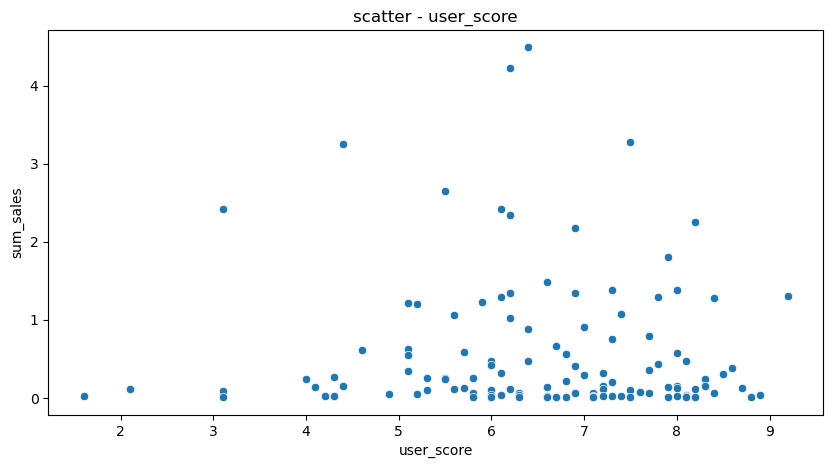

In [44]:
plt.figure(figsize=(10,5))
sns.scatterplot(x='user_score', y='sum_sales', data=xone)
plt.title('scatter - user_score')

#### Вывод для XOne
- В целом, чем лучше отзывы, чем лучше продажи, при этом важна корреляция только по отзывам критиков, а не по отзывам игроков. Возможно потому что новые покупатели доверяют мнению авторитетных критиков при покупке игры 

### Зависимость продаж и отзывов - другие платформы
- Сделаем отдельную функцию для других платформ
- Сделаем чтобы графики выводились паралелльно, в одинаковом масшабе
- Настроим sns

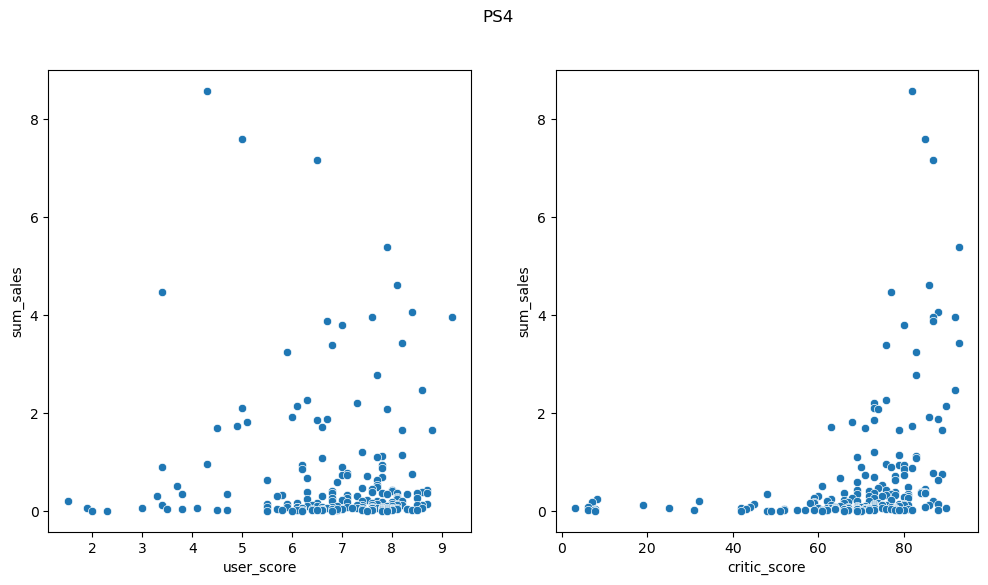

Корреляция отзывы пользователей/продажи: -0.0597384571263821
Корреляция отзывы критиков/продажи: 0.3402018032493364



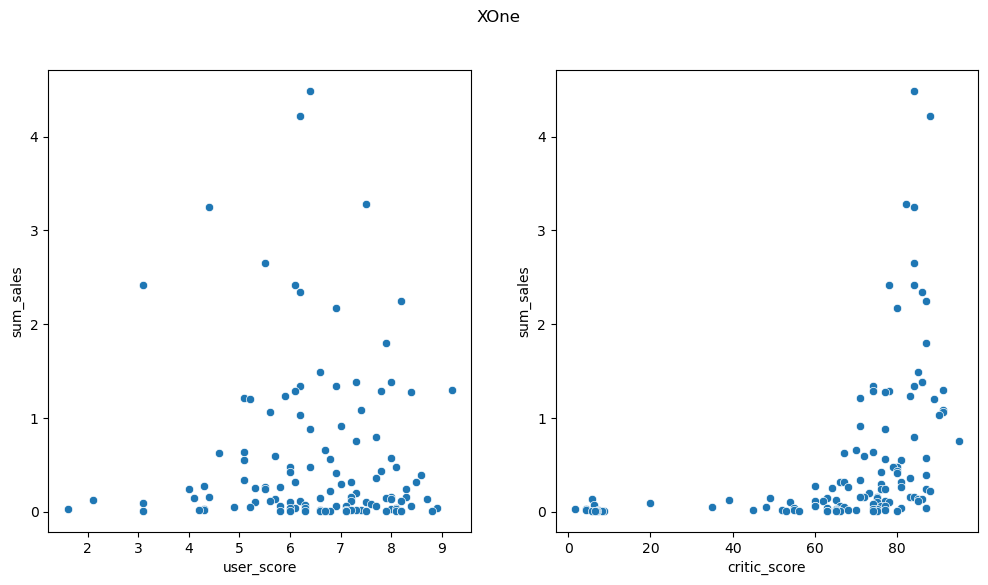

Корреляция отзывы пользователей/продажи: -0.04146733387366271
Корреляция отзывы критиков/продажи: 0.3933885175899676



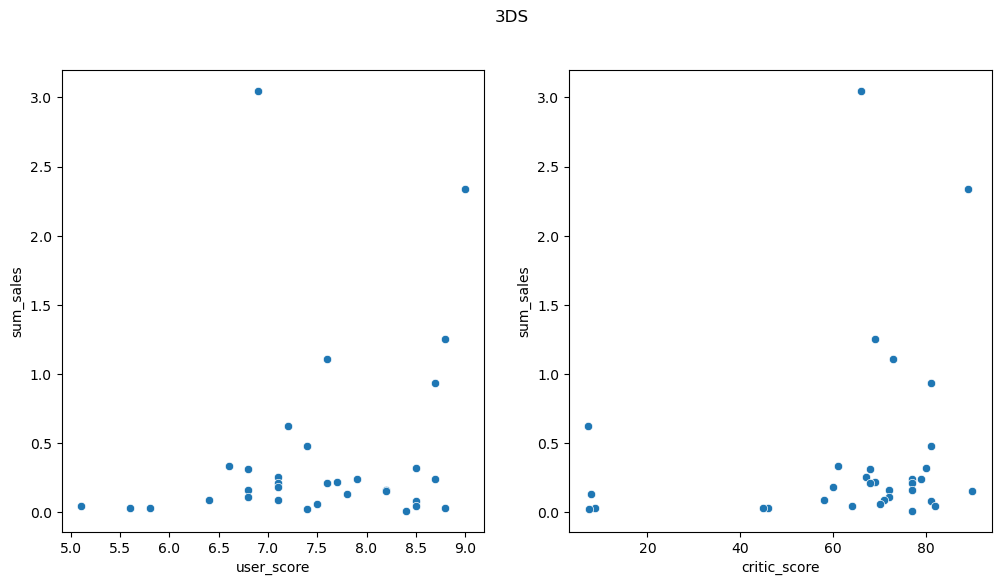

Корреляция отзывы пользователей/продажи: 0.19879627008102982
Корреляция отзывы критиков/продажи: 0.18113865448362101



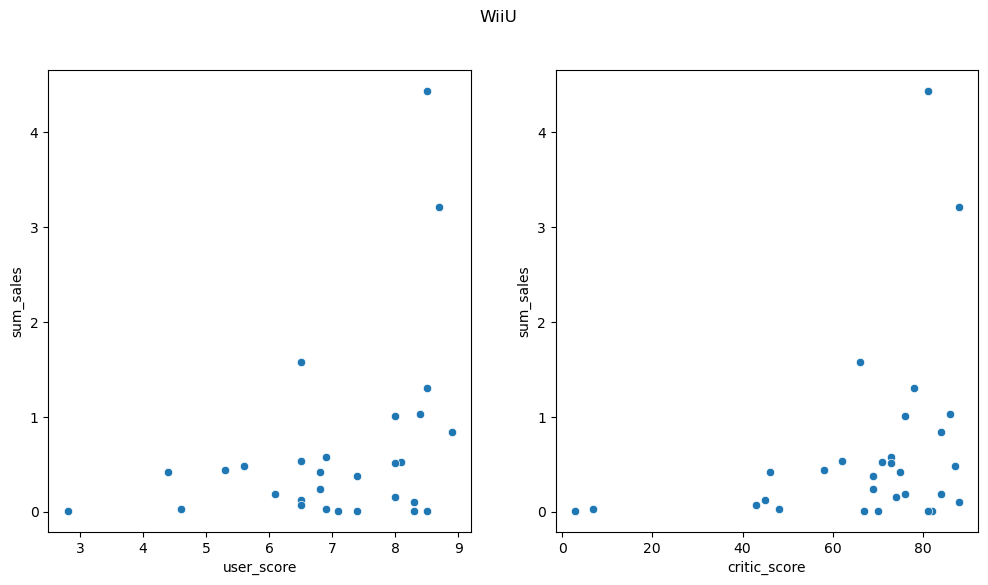

Корреляция отзывы пользователей/продажи: 0.3635185724809445
Корреляция отзывы критиков/продажи: 0.3242460830768244



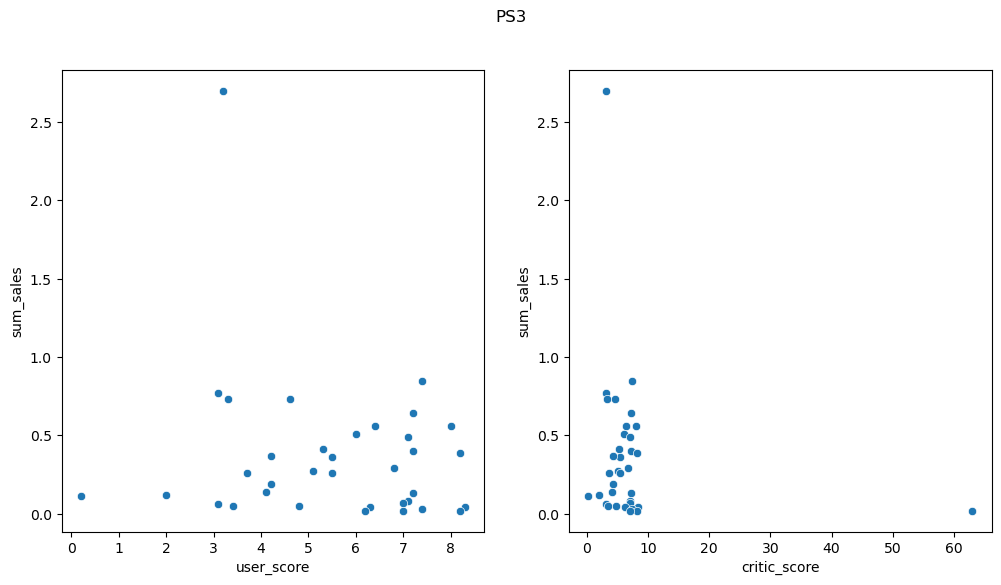

Корреляция отзывы пользователей/продажи: -0.16529542277898507
Корреляция отзывы критиков/продажи: -0.15436839708619324



In [45]:
def platform_cor(platform_n):
    platform_data = data_5_2015[data_5_2015['platform']==platform_n]
    fig, ax = plt.subplots(1 ,2, figsize=(12,6))
    sns.scatterplot(x='user_score', y='sum_sales', data=platform_data,ax=ax[0])
    sns.scatterplot(x='critic_score', y='sum_sales', data=platform_data,ax=ax[1])
    fig.suptitle(platform_n)                       
    plt.show()
    
    user_cor = platform_data['user_score'].corr(platform_data['sum_sales'])
    critic_cor = platform_data['critic_score'].corr(platform_data['sum_sales'])
    print('Корреляция отзывы пользователей/продажи:',user_cor)
    print('Корреляция отзывы критиков/продажи:',critic_cor)
    print('')
    
for platform_n in top_5:
    platform_cor(platform_n)   
    
    
    
    

#### Вывод для остальных платформ
- Очевидный вывод - чем лучше отзывы, тем выше продажи
- В целом, отзывы критиков показывают гораздо лучшую корреляция с продажами, чем отзывы пользователей

In [46]:
data_5_2015_genre_count=data_5_2015.pivot_table(index='genre',values='name',\
                                                aggfunc='count').sort_values(by='name', ascending=False)
display(data_5_2015_genre_count)

,name
genre,
Action,297
Role-Playing,90
Sports,77
Shooter,63
Misc,56
Adventure,52
Fighting,32
Racing,31
Platform,23


**Выводы**
- Самые высокие продажи и больше всего игр выпускается в жанре Shooter, это безусловный лидер
- Далее с большим отрывом следует группа из жанров RP и Sports 
- В третьей группе находятся все остальные жанры со значительно меньшим количеством игр и продажами
- Жанр Puzzle - полный аутсайдер, никто не складывает кубики на консолях

,sum_sales
genre,
Shooter,0.570
Role-Playing,0.185
Sports,0.170
Simulation,0.140
Platform,0.140
Fighting,0.095
Racing,0.090
Action,0.080
Strategy,0.070


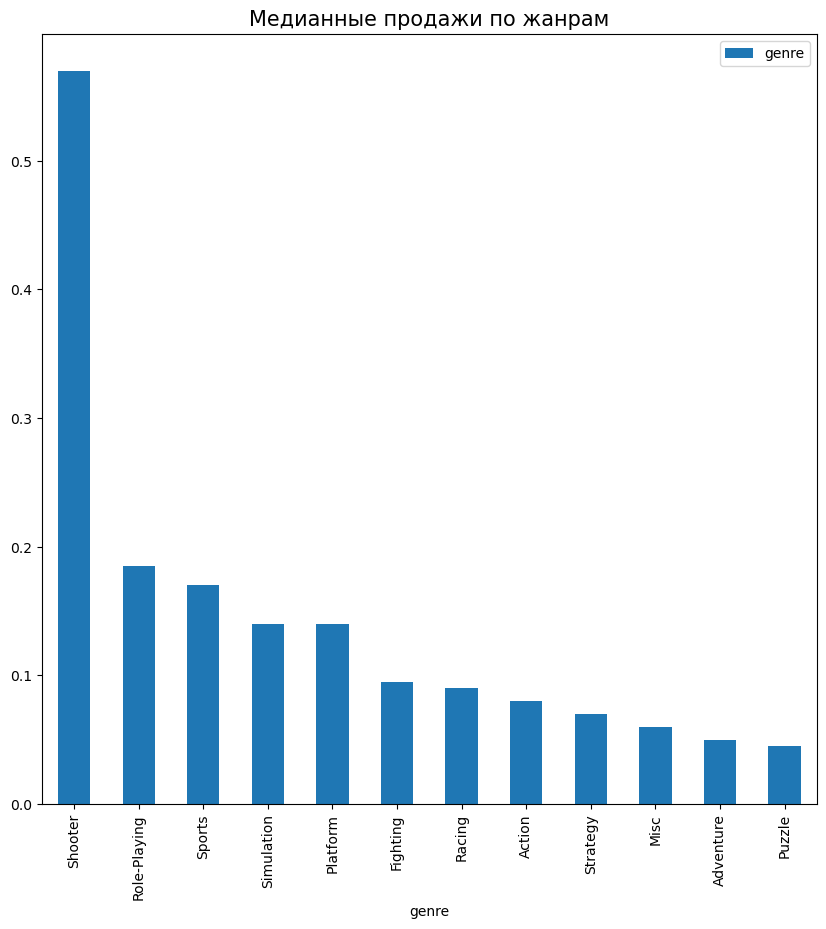

In [47]:
data_5_2015_genre_sales=data_5_2015.pivot_table(index='genre',values='sum_sales',\
                                                aggfunc='median').sort_values(by='sum_sales', ascending=False)
display(data_5_2015_genre_sales)
data_5_2015_genre_sales.plot(kind='bar',y='sum_sales',figsize=(10,10),label='genre')
plt.title('Медианные продажи по жанрам', fontsize=15)
plt.show()

## Портреты пользователей
**Составим портрет пользователя каждого региона**
- Определим для пользователя каждого региона (NA, EU, JP)
  - Самые популярные платформы (топ-5). Опишите различия в долях продаж.
  - Самые популярные жанры (топ-5). Поясните разницу.
- Влияет ли рейтинг ESRB на продажи в отдельном регионе?

### Северная Америка

В Северной Америке среди 5 самых популярных платформ:
- Почти половину рынка занимает PS4
- XOne контролирует больше трети рынка
- Остальное приходится на другие платформы
- На рынке Северной Америки конкурируют две основные платформы

,na_sales
platform,
PS4,63.86
XOne,50.30
3DS,10.31
WiiU,8.86
X360,8.05


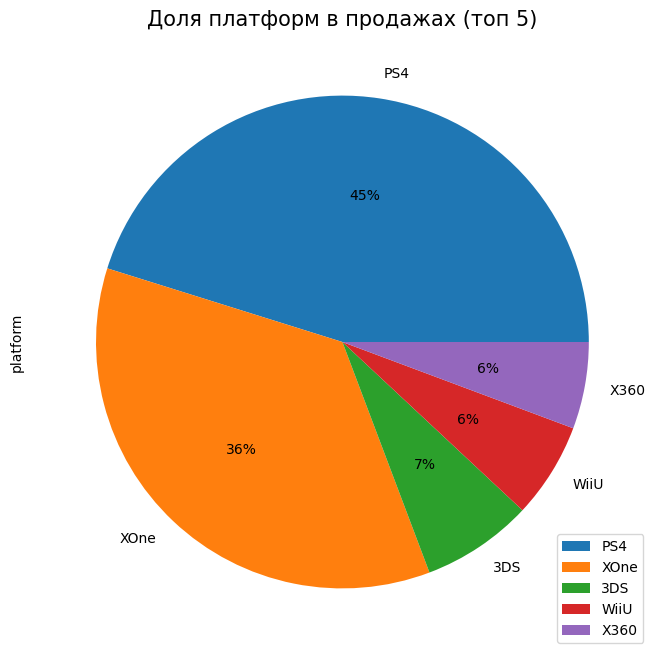

In [48]:
data_2015_na=data_2015.pivot_table(index='platform',values='na_sales',\
                                   aggfunc='sum').sort_values(by='na_sales', ascending=False)
display(data_2015_na.head(5))
data_2015_na.head(5).plot(kind='pie',y='na_sales',figsize=(8,8),label='platform',autopct = '%0.0f%%')
plt.title('Доля платформ в продажах (топ 5)', fontsize=15)
plt.show()

В Северной Америке среди 5 самых популярных жанров:
- Лучшие продажи в Shooter, это самый популярный жанр
- Далее с большим отставанием Platform и Sports

,na_sales
genre,
Shooter,0.17
Platform,0.05
Sports,0.04
Fighting,0.03
Misc,0.01


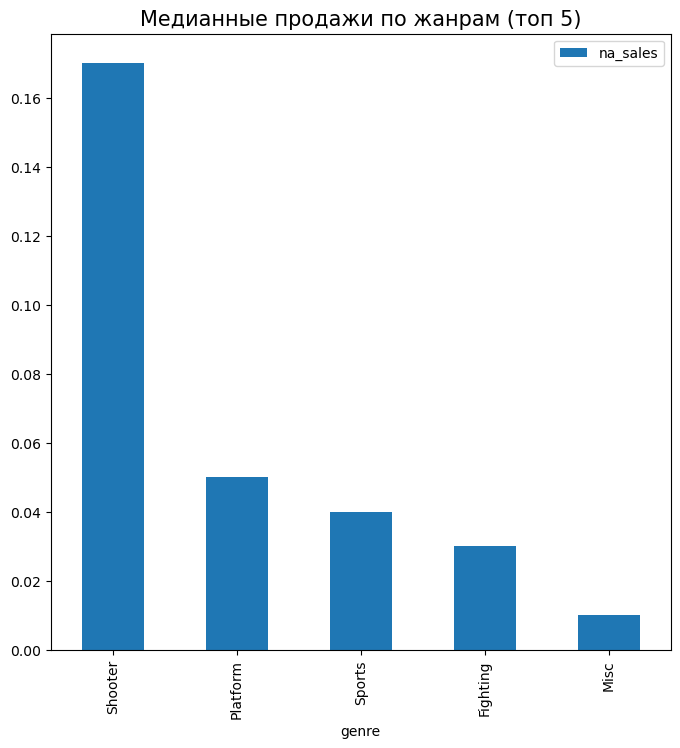

In [49]:
data_2015_na_genre=data_2015.pivot_table(index='genre',values='na_sales',\
                                   aggfunc='median').sort_values(by='na_sales', ascending=False)
display(data_2015_na_genre.head(5))
data_2015_na_genre.head(5).plot(kind='bar',y='na_sales',figsize=(8,8))
plt.title('Медианные продажи по жанрам (топ 5)', fontsize=15)
plt.show()

В Северной Америке по возрастным рейтингам:
- Больше всего игр 17+ и игр без рейтинга. Процедура присвоения рейтинга не является обязательной
- Продажи по остальным рейтингам распределяются примерно одинаково

,na_sales
rating,
M,47.03
NA,37.44
E,26.59
T,22.86
E10+,17.87


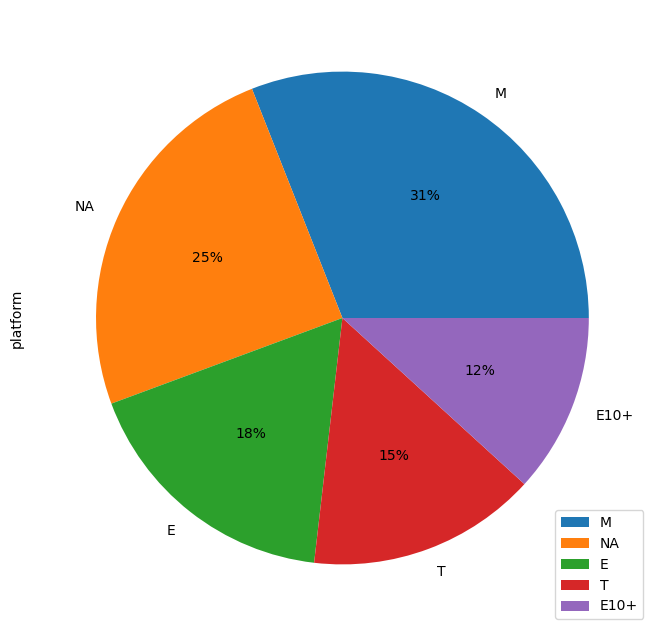

In [50]:
data_2015_na_e=data_2015.pivot_table(index='rating',values='na_sales',\
                                   aggfunc='sum').sort_values(by='na_sales', ascending=False)
display(data_2015_na_e.head(5))
data_2015_na_e.head(5).plot(kind='pie',y='na_sales',figsize=(8,8),label='platform',autopct = '%0.0f%%')
plt.show()

### Европа

В Европе среди 5 самых популярных платформ:
- PS4 занимает 62%, почти монополист
- XOne идет на втором месте с большим отрывом
- В Европе, очевидным лидером является PS

,eu_sales
platform,
PS4,83.54
XOne,28.10
PC,9.10
3DS,7.39
PS3,7.30


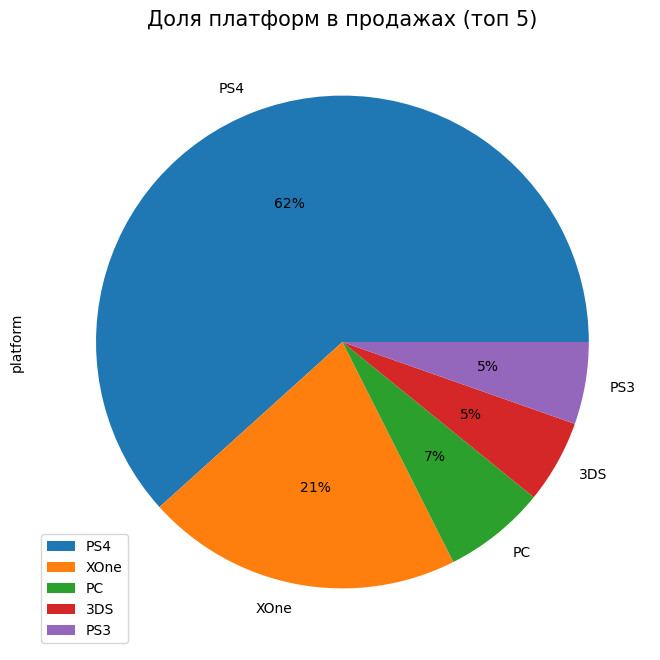

In [51]:
data_2015_eu=data_2015.pivot_table(index='platform',values='eu_sales',\
                                   aggfunc='sum').sort_values(by='eu_sales', ascending=False)
display(data_2015_eu.head(5))
data_2015_eu.head(5).plot(kind='pie',y='eu_sales',figsize=(8,8),label='platform',autopct = '%0.0f%%')
plt.title('Доля платформ в продажах (топ 5)', fontsize=15)
plt.show()

В Европе среди 5 самых популярных жанров:
- Большая часть рынка приходится на Shooter, это самый популярный жанр - люди любят стрелялки

,eu_sales
genre,
Shooter,0.150
Sports,0.050
Racing,0.045
Platform,0.040
Strategy,0.040


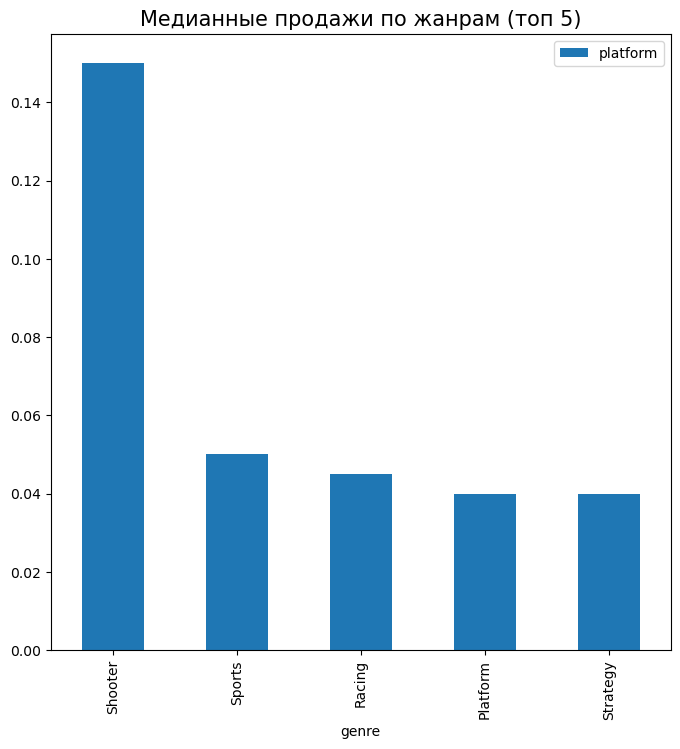

In [52]:
data_2015_eu_genre=data_2015.pivot_table(index='genre',values='eu_sales',\
                                   aggfunc='median').sort_values(by='eu_sales', ascending=False)
display(data_2015_eu_genre.head(5))
data_2015_eu_genre.head(5).plot(kind='bar',y='eu_sales',figsize=(8,8),label='platform')
plt.title('Медианные продажи по жанрам (топ 5)', fontsize=15)
plt.show()

В Европе по возрастным рейтингам:
- Больше всего игр 17+ и игр без рейтинга, ситуация аналогична Северной Америке
- На 3 месте игры для всех (E)

,eu_sales
rating,
M,45.54
NA,35.71
E,34.83
T,20.32
E10+,11.54


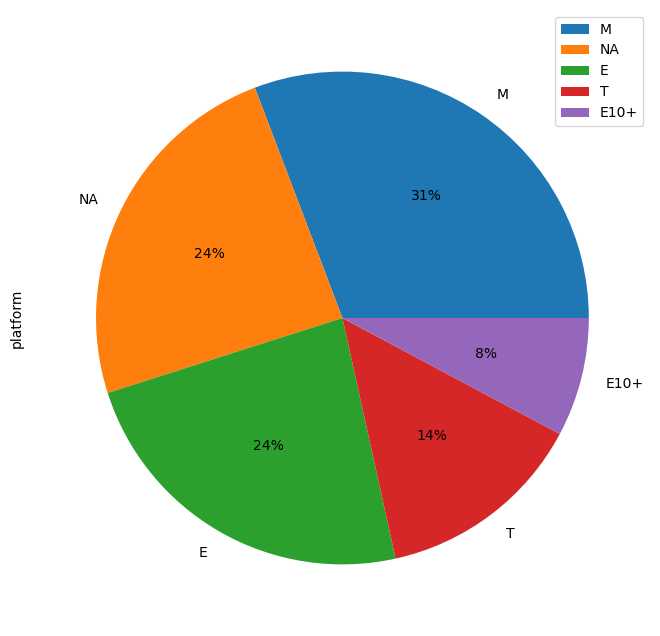

In [53]:
data_2015_eu_e=data_2015.pivot_table(index='rating',values='eu_sales',\
                                   aggfunc='sum').sort_values(by='eu_sales', ascending=False)
display(data_2015_eu_e.head(5))
data_2015_eu_e.head(5).plot(kind='pie',y='eu_sales',figsize=(8,8),label='platform',autopct = '%0.0f%%')
plt.show()

### Япония

В Японии среди 5 самых популярных платформ:
- Ситуация кардинально отличается от Европы или Северной Америки
- Xbox вообще не присутствует среди топ 5, в Японии любят местные платформы
- 3DS занимает почти половину рынка

,jp_sales
platform,
3DS,23.55
PS4,12.05
PSV,8.41
PS3,4.97
WiiU,4.12


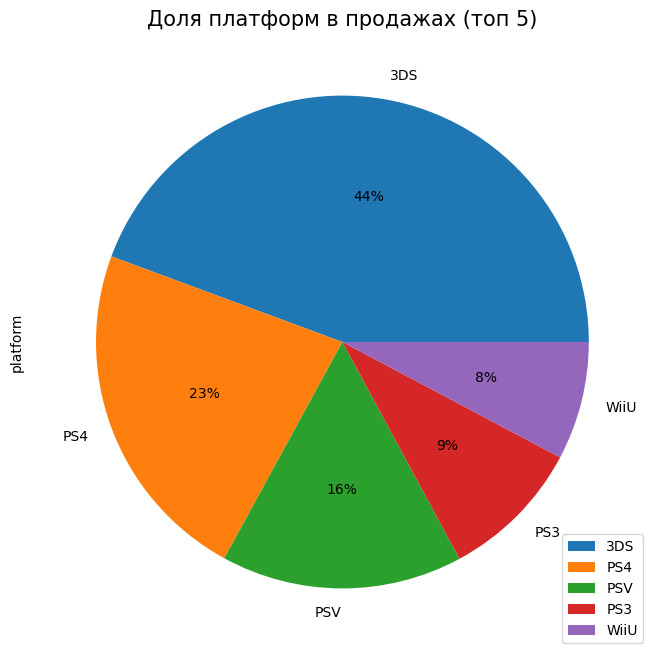

In [54]:
data_2015_jp=data_2015.pivot_table(index='platform',values='jp_sales',\
                                   aggfunc='sum').sort_values(by='jp_sales', ascending=False)
display(data_2015_jp.head(5))
data_2015_jp.head(5).plot(kind='pie',y='jp_sales',figsize=(8,8),label='platform',autopct = '%0.0f%%')
plt.title('Доля платформ в продажах (топ 5)', fontsize=15)
plt.show()

В Японии среди 5 самых популярных жанров:
- Самый прибыльный жанр - RP, чуть хуже Fighting	
- Жанровые предпочтения сильно отличаются от Европы или США

,jp_sales
genre,
Role-Playing,0.05
Fighting,0.03
Misc,0.02
Action,0.01
Adventure,0.01


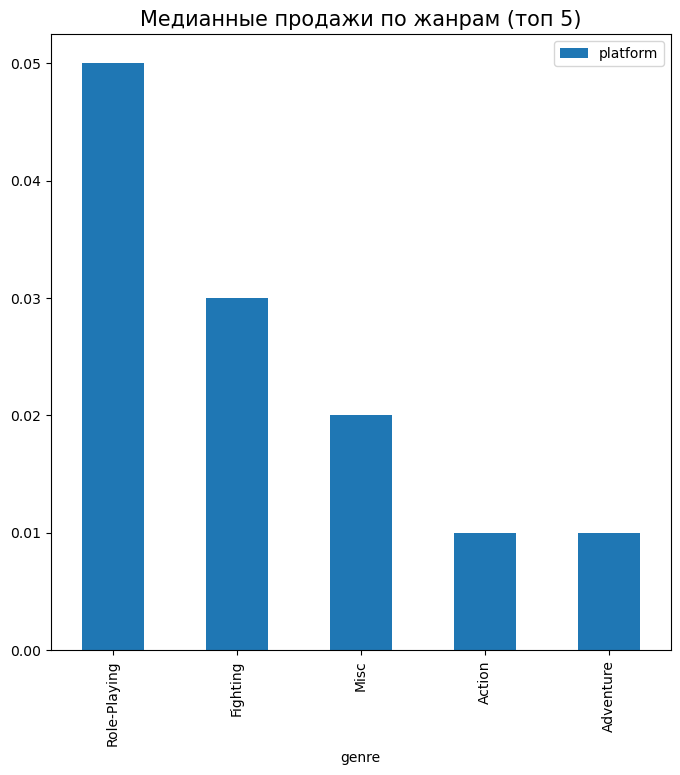

In [55]:
data_2015_jp_genre=data_2015.pivot_table(index='genre',values='jp_sales',\
                                   aggfunc='median').sort_values(by='jp_sales', ascending=False)
display(data_2015_jp_genre.head(5))
data_2015_jp_genre.head(5).plot(kind='bar',y='jp_sales',figsize=(8,8),label='platform')
plt.title('Медианные продажи по жанрам (топ 5)', fontsize=15)
plt.show()

В Японии по возрастным рейтингам:
- Больше половины игр не имеет рейтинга - ESRB это американская организация, японских покупателей не интересуют их правила. Кроме того, значительная часть рынка принадлежит местным платформам и издателям
- Примерно одинаковое распределение по рейтингам для игр, которые все же имеют таковой

,jp_sales
rating,
NA,32.89
T,7.70
E,5.25
M,4.29
E10+,3.27


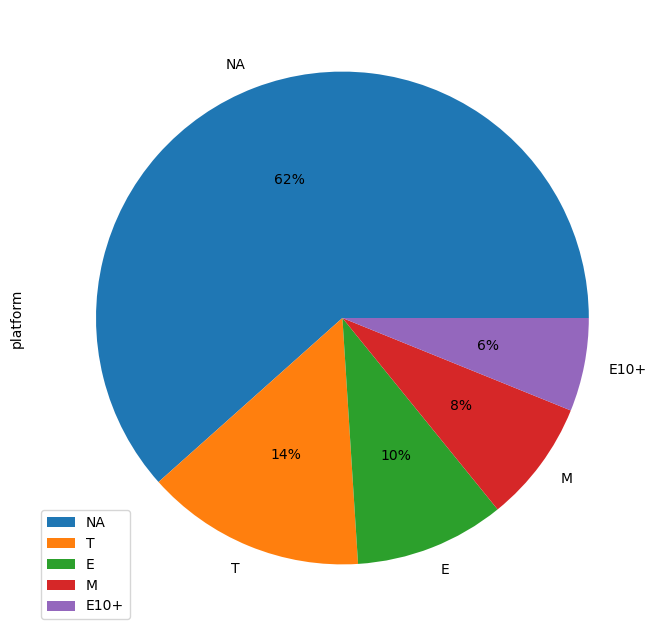

In [56]:
data_2015_jp_e=data_2015.pivot_table(index='rating',values='jp_sales',\
                                   aggfunc='sum').sort_values(by='jp_sales', ascending=False)
display(data_2015_jp_e.head(5))
data_2015_jp_e.head(5).plot(kind='pie',y='jp_sales',figsize=(8,8),label='platform',autopct = '%0.0f%%')
plt.show()

## Проверка гипотез




### Пользовательские рейтинги платформ
- Нулевая гипотеза H₀: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги платформ Xbox One и PC не одинаковые

Будем использовать t-тест для оценки равенства средних двух генеральных совокупностей. Проверим условия, применим ли такой тест:
- Генеральные совокупности не зависят друг от друга - ок
- Выборочные средние должны быть нормально распределены. Выборка достаточно велика и благодаря ЦПТ выборочные средние, которые можно получить из одной и той же генеральной совокупности, будут распределены нормально вокруг истинного среднего этой совокупности
- Дисперсии рассматриваемых генеральных совокупностей должны быть равны. Мы этого точно не знаем, поэтому укажем equal_var=False


In [57]:
data_platform_xone = data[(data['platform']=='XOne') & (data['year_of_release']>=2006)]['user_score'].dropna()
data_platform_pc= data[(data['platform']=='PC') & (data['year_of_release']>=2006)]['user_score'].dropna()
print(data_platform_xone.mean())
print(data_platform_pc.mean())

alpha=0.01 # примем уровень значимости

results=st.ttest_ind(data_platform_xone,data_platform_pc,equal_var=False)

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

6.52142857142857
6.830081300813019
0.01014021353497224
Не получилось отвергнуть нулевую гипотезу


**Вывод: c вероятностью в 1% можно получить различность рейтингов PC и XOne**

### Средние пользовательские рейтинги жанров Action и Sports разные.

- Нулевая гипотеза H₀: Средние пользовательские рейтинги жанров Action и Sports разные;
- Альтернативная гипотеза H₁: Средние пользовательские рейтинги жанров Action и Sports одинаковые

In [58]:
data_genre_action = data[(data['genre']=='Action') & (data['year_of_release']>=2006)]['user_score'].dropna()
data_genre_sports = data[(data['genre']=='Sports') & (data['year_of_release']>=2006)]['user_score'].dropna()
print(data_genre_action.mean())
print(data_genre_sports.mean())

alpha=0.01 # примем уровень значимости

results=st.ttest_ind(data_genre_action,data_genre_sports,equal_var=False)

print(results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

6.878625377643504
6.4164201183431935
5.319061853268226e-10
Отвергаем нулевую гипотезу


**Вывод: с вероятностью выше уровня статистической значимости рейтинги жанров Action и Sports одинаковые**

# Общий вывод

**1. Подготовка данных. Перед началом анализа данные были подготовлены и проверены соотвествующим образом:**
- Изучен общий вид таблицы и ее основные характеристики
- Переименованы столбцы (приведены к нижнему регистру)
- Проведена проверка на дубликаты
- Таблица была проверена на пропуски
    - Удалены строки с пропусками, не влияющими на общий вид данных
    - Заполнены, по возможности, пропуски в столбце critic score
    - Выявлено и обработано значение TBD (to be defined)
    - Вставлены заглушки там где рейтинг ESRB не применим
- Создан дополнительный столбец с суммарными продажами по всем регионам
- Произведено преобразование типов данных

**2. Исследовательский анализ данных**
- Оценено общее количество новых игр по годам. Количество выпускаемых игр росло до 2008-2009 годов, затем последовал резкий спад
- Выбран период для оценки, слишком старые данные отброшены
- Определены наиболее популярные платформы
    - Средняя жизнь платформы составляет 10 лет, с пиком продаж на пятом году
    - Самые продаваемые игры - для XOne и PS (всех поколений)
- Построен boxplot по популярным платформам, выбраны наиболее востребованные
- Выявлена корреляция между отзывами (пользователей или критиков) и продажам.
- Определено, что продажи гораздно сильнее связаны с отзывами критиков, нежели с отзывами пользователей
- Построено распределение продаж игр по жанрам. Опрелены самые прибыльные и самые неприбыльные жанры.

**3. Портреты пользователей**
- Построены портреты пользователей по трем регионам (Северная Америка, Европа, Япония). Использованы самые свежие данные - за последний год
- Самые прибыльные платформы и жанры:
    - Северная Америка: шутеры на PS4
    - Европа: опять шутеры на PS4
    - Япония: RP на 3DS
- Продажи различаются в зависимости от возрастного рейтинга:
    - Северная Америка: В основном игры 17+ или без рейтинга остальные примерно поровну
    - Европа: Опять игры 17+ или без рейтинга, чуть меньше игры для всех возрастов
    - Япония: Рейтинг ESRB вообще очень мало используется
- Из потретов видно что ситуация в Европе и Северной Америке примерно одинаковая, в том время как в Японии рынок кардинально иной. Это обусловлено разницей в культуре и менталитете

**4. Проверка гипотез**
- С помощью t теста проверены две гипотезы:
    - О равенстве средних пользовательских рейтингов PC и XOne - гипотеза не отвергнута
    - О равенстве средних пользовательских рейтингов жанров Action и Sports - гипотеза отвергнута
    
**5. Где и какие игры продавать?**
- Самое выгодное - продавать шутеры на PS4 в Северной Америке и Европе
- Гораздно менее выгодны игры Sport/Racing/Platform на PS4 в Северной Америке и Европе
- Для рынка Японии - RP и Fighting на 3DS